In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
file_path='/Users/apple/Desktop/Last_year/IRS/222102535karim_assignment2/222102535karim_Preprosising_reviews.csv'

In [10]:
data=pd.read_csv(file_path)

In [11]:
data.head()

Customer Name  \
0          Gloria V.   
1        T. J. Wells   
2            Laura M   
3  Kathleen Edelmuth   
4      Marie Valerie   

   A Little SPOT of Emotion 8 Book Box Set (Books 1-8: Anger, Anxiety, Peaceful, Happiness, Sadness, Confidence, Love, & Scribble Emotion)  \
0                                                1.0                                                                                         
1                                                1.0                                                                                         
2                                                5.0                                                                                         
3                                                3.0                                                                                         
4                                                4.0                                                                                         

   A Navy SEAL's Bug-In Guide: How to Turn Your House into the Safest Place on Earth  \
0                                                2.0                                   
1                                                2.0                                   
2                                                3.0                                   
3                                                4.0                                   
4                                                3.0                                   

   Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones  \
0                                                2.0                           
1                                                2.0                           
2                                                NaN                           
3                                                3.0                           
4                                                1.0                           

   Dad, I Want to Hear Your Story: A Father’s Guided Journal To Share His Life & His Love (Hear Your Story Books)  \
0                                                3.0                                                                
1                                                4.0                                                                
2                                                5.0                                                                
3                                                1.0                                                                
4                                                4.0                                                                

   Framed: Astonishing True Stories of Wrongful Convictions  \
0                                                3.0          
1                                                3.0          
2                                                NaN          
3                                                3.0          
4                                                2.0          

   From Here to the Great Unknown: A Memoir  \
0                                       1.0   
1                                       2.0   
2                                       5.0   
3                                       3.0   
4                                       3.0   

   Good Energy: The Surprising Connection Between Metabolism and Limitless Health  \
0                                                2.0                                
1                                                1.0                                
2                                                4.0                                
3                                                NaN                                
4                                                2.0                                

   Hot Mess (Diary of a Wimpy Kid Book 19) (Diary of a Wimpy Kid, 19) (Volume 19)  \
0                                     

In [12]:
total_users = data.shape[0]  
total_items = data.shape[1] - 1 
#we remove the 'customer name' column
ratings_count = data.iloc[:, 1:].count()

total_users, total_items, ratings_count.head()


(125,
 19,
 A Little SPOT of Emotion 8 Book Box Set (Books 1-8: Anger, Anxiety, Peaceful, Happiness, Sadness, Confidence, Love, & Scribble Emotion)    122
 A Navy SEAL's Bug-In Guide: How to Turn Your House into the Safest Place on Earth                                                          122
 Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones                                                                  122
 Dad, I Want to Hear Your Story: A Father’s Guided Journal To Share His Life & His Love (Hear Your Story Books)                             121
 Framed: Astonishing True Stories of Wrongful Convictions                                                                                   120
 dtype: int64)

In [13]:
missing_ratings = data.isna()

user_missing_counts = missing_ratings.iloc[:, 1:].sum(axis=1)  

users_with_missing_ratings = user_missing_counts[user_missing_counts.isin([2, 3, 5])].index

selected_users = users_with_missing_ratings[:3]

missing_percentage = missing_ratings.mean() * 100  

selected_items = missing_percentage[missing_percentage.isin([4, 10])].index

selected_users, selected_items


(Index([2, 10, 31], dtype='int64'),
 Index(['Framed: Astonishing True Stories of Wrongful Convictions', 'Patriot: A Memoir'], dtype='object'))

In [7]:
item_1 = selected_items[0]
item_2 = selected_items[1]

# Check if the selected users have ratings for the selected items
co_rated_users_item_1 = data.loc[selected_users, item_1].notna()  # Active users for item 1
co_rated_users_item_2 = data.loc[selected_users, item_2].notna()  # Active users for item 2

common_users = co_rated_users_item_1 & co_rated_users_item_2
no_common_users = common_users.sum()
#find the co-related between items 
no_co_rated_items = co_rated_users_item_1.sum() + co_rated_users_item_2.sum()

result_array = np.array([[no_common_users, no_co_rated_items]])

no_common_users, no_co_rated_items, result_array


(2, 5, array([[2, 5]]))

/var/folders/2t/bv9pyvvs1y39zktfxmgd8bnc0000gn/T/ipykernel_2011/1267678706.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


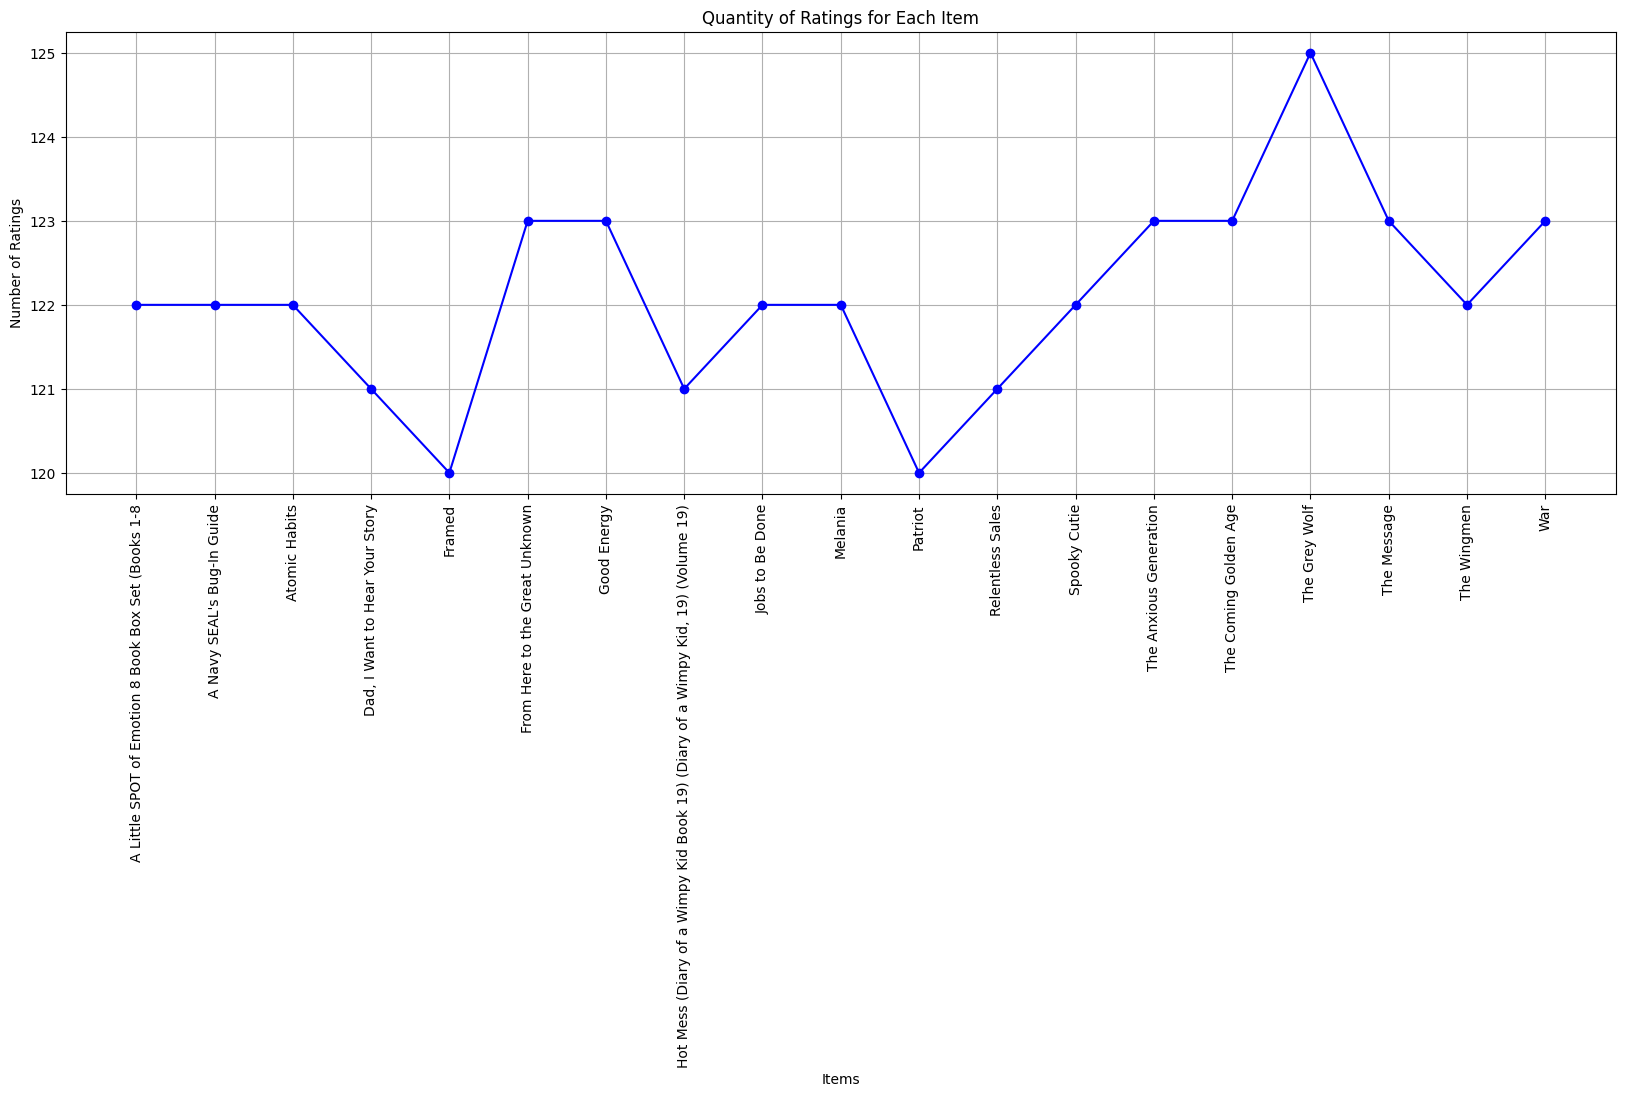

In [20]:

# Draw a curve to illustrate the quantity of ratings for each item
plt.figure(figsize=(20, 6))

# Plot the entire ratings count
ratings_count.plot(kind='line', marker='o', color='b', linestyle='-', title="Quantity of Ratings for Each Item")

# Set labels
plt.xlabel("Items")
plt.ylabel("Number of Ratings")

# Adjust x-ticks to show only the first part of product names for better visualization
shortened_labels = [name.split(":")[0] for name in ratings_count.index]  # Take only the part before ':' for each product name
plt.xticks(ticks=range(len(ratings_count)), labels=shortened_labels, rotation=90)

# Add grid and tight layout for better spacing
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [22]:
# Calculate the maximum number of users who have co-rated at least 30% of the items for each active user
threshold_percentage = 0.30  # 30%

# For each user, calculate the number of items they have rated (non-NaN values)
user_ratings_count = data.iloc[:, 1:].notna().sum(axis=1)

# For each user, calculate the threshold in terms of the minimum number of items they need to co-rate
user_threshold = total_items * threshold_percentage

# Determine the number of users who have co-rated at least 30% of items
users_above_threshold = (user_ratings_count >= user_threshold).sum()

users_above_threshold, user_threshold


(125, 5.7)

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Remove non-numeric columns ('Customer Name')
data_numeric = data.drop(columns=['Customer Name'])

# Convert missing ratings (NaN) to 0
data_filled = data_numeric.fillna(0)

# Compute cosine similarity between each user
cos_sim = cosine_similarity(data_filled)
cos_sim

array([[1.        , 0.87249271, 0.72923272, ..., 0.83339304, 0.78142071,
        0.86776086],
       [0.87249271, 1.        , 0.74497345, ..., 0.8182297 , 0.71432935,
        0.7959214 ],
       [0.72923272, 0.74497345, 1.        , ..., 0.78926177, 0.7863571 ,
        0.8028401 ],
       ...,
       [0.83339304, 0.8182297 , 0.78926177, ..., 1.        , 0.79774107,
        0.9317786 ],
       [0.78142071, 0.71432935, 0.7863571 , ..., 0.79774107, 1.        ,
        0.85612644],
       [0.86776086, 0.7959214 , 0.8028401 , ..., 0.9317786 , 0.85612644,
        1.        ]])

In [24]:
# Find the top 20% similar users for each active user
top_20_percent = int(data_filled.shape[0] * 0.20)
top_similar_users = np.argsort(cos_sim, axis=1)[:, -top_20_percent:]
top_similar_users

array([[ 68,   9, 117, ...,  86,  41,   0],
       [ 44,  56,  80, ...,  12,   7,   1],
       [ 12, 111,  63, ...,   4, 102,   2],
       ...,
       [ 40,  15,  53, ...,  89, 124, 122],
       [ 60,  77,  80, ..., 111,  27, 123],
       [ 62,  35, 116, ...,  24, 122, 124]])

In [26]:
# Predict the ratings for items not yet rated by the active user
# take the weighted average of ratings from the top 20% users
predictions = []
for user_idx in range(data_filled.shape[0]):
    similar_users = top_similar_users[user_idx]
    # Weighted sum of ratings from similar users for items not rated by the current user
    user_ratings = data_filled.iloc[similar_users]
    weighted_ratings = user_ratings.mean(axis=0)
    predictions.append(weighted_ratings)
predictions

[A Little SPOT of Emotion 8 Book Box Set (Books 1-8: Anger, Anxiety, Peaceful, Happiness, Sadness, Confidence, Love, & Scribble Emotion)             3.08
 A Navy SEAL's Bug-In Guide: How to Turn Your House into the Safest Place on Earth                                                                   2.88
 Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones                                                                           2.60
 Dad, I Want to Hear Your Story: A Father’s Guided Journal To Share His Life & His Love (Hear Your Story Books)                                      3.60
 Framed: Astonishing True Stories of Wrongful Convictions                                                                                            3.00
 From Here to the Great Unknown: A Memoir                                                                                                            2.68
 Good Energy: The Surprising Connection Between Metabolism and Limitless Hea

In [32]:
# Compute the discount factor as the number of common items rated
#total number 
common_items = (data_filled > 0).sum(axis=1).values  
# Reshape common_items to match the shape of cos_sim (125, 1)
common_items_reshaped = common_items[:, np.newaxis]

# Discounted similarity
# reshping 
discounted_similarity = cos_sim * common_items_reshaped
discounted_similarity

array([[19.        , 16.57736157, 13.85542165, ..., 15.83446767,
        14.84699342, 16.4874563 ],
       [15.70486886, 18.        , 13.40952217, ..., 14.72813454,
        12.85792821, 14.32658527],
       [11.66772349, 11.91957526, 16.        , ..., 12.62818837,
        12.58171359, 12.8454416 ],
       ...,
       [15.83446767, 15.54636424, 14.99597369, ..., 19.        ,
        15.15708042, 17.70379346],
       [14.06557271, 12.85792821, 14.15442779, ..., 14.35933934,
        18.        , 15.41027599],
       [16.4874563 , 15.12250667, 15.2539619 , ..., 17.70379346,
        16.26640243, 19.        ]])

In [29]:
# Compute the top 20% similar users based on discounted similarity
top_20_percent_discounted = np.argsort(discounted_similarity, axis=1)[:, -top_20_percent:]
top_20_percent_discounted

array([[ 68,   9, 117, ...,  86,  41,   0],
       [ 44,  56,  80, ...,  12,   7,   1],
       [ 12, 111,  63, ...,   4, 102,   2],
       ...,
       [ 40,  15,  53, ...,  89, 124, 122],
       [ 60,  77,  80, ..., 111,  27, 123],
       [ 62,  35, 116, ...,  24, 122, 124]])

In [35]:
# Predict ratings using discounted similarity
discounted_predictions = []
for user_idx in range(data_filled.shape[0]):
    # Get the top 20% similar users for the current user
    similar_users = top_20_percent_discounted[user_idx]
    
    # Get the ratings of the similar users for all items
    user_ratings = data_filled.iloc[similar_users]
    
    # Extract the similarity values for the top similar users
    similarity_values = discounted_similarity[user_idx, similar_users]
    
    # Apply similarity weighting: dot product of similarity values and the ratings
    weighted_ratings = np.dot(similarity_values, user_ratings) / np.sum(np.abs(similarity_values))
    
    # Append the predicted ratings for each item
    discounted_predictions.append(weighted_ratings)

# convert to numpy array it't better to use in prossing 
discounted_predictions = np.array(discounted_predictions)
discounted_predictions

array([[3.05361076, 2.86392719, 2.59801705, ..., 2.71222733, 3.80376116,
        3.68518965],
       [2.86417784, 2.9524526 , 2.99697276, ..., 3.47958347, 2.43288489,
        3.38708592],
       [3.89035184, 2.95515024, 2.09812096, ..., 3.53152155, 3.34925039,
        3.06904315],
       ...,
       [3.91606487, 3.56636321, 2.75205982, ..., 2.58959014, 2.70898126,
        3.38955972],
       [3.20359685, 3.92959793, 3.52669642, ..., 3.16591387, 3.72442553,
        3.60140363],
       [3.89144481, 3.69343788, 2.99903166, ..., 2.63200569, 3.63290538,
        3.12325464]])

NameError: name 'discounted_preditions' is not defined